In [17]:
from google.colab import drive
drive.mount('/content/drive') # remove the cell if colab is not used

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
base_path = Path('/content/drive/MyDrive/Colab Notebooks/titanic.csv')

# Analiza i przetwarzanie danych na temat Titanica

#### Wyobraź sobie, że pewnego wakacyjnego dnia, będąc na plaży w pełnym słońcu, odbierasz telefon od nieznanego numeru.
Robisz to niechętnie — zasłużyłeś/aś przecież na odpoczynek i chcesz mieć ten czas tylko dla siebie. Już masz na końcu języka wymijającą odpowiedź, gdy nagle z drugiej strony słyszysz:
„Czy jesteś gotowy, by tego lata rozwikłać jedną z największych zagadek ludzkości?”

Jako osoba z natury ciekawa świata i ze świetnym umysłem analitycznym, szybko zapominasz o plaży i wakacjach. Zaintrygowany/a dopytujesz o szczegóły, ale rozmówca nie chce zdradzić zbyt wiele. Wiadomo jedynie, że chodzi o *zatonięcie Titanica w 1914* roku, a celem misji jest ustalenie, które osoby miały szansę przeżyć.

**Ty** — jako **renomowany analityk danych** — byłeś/byłaś ich pierwszym wyborem do analizy i oczyszczenia danych. Mimo wątpliwości postanawiasz podjąć się zadania, mając nadzieję, że twoja wiedza może zostać praktycznie wykorzystana w słusznym celu.

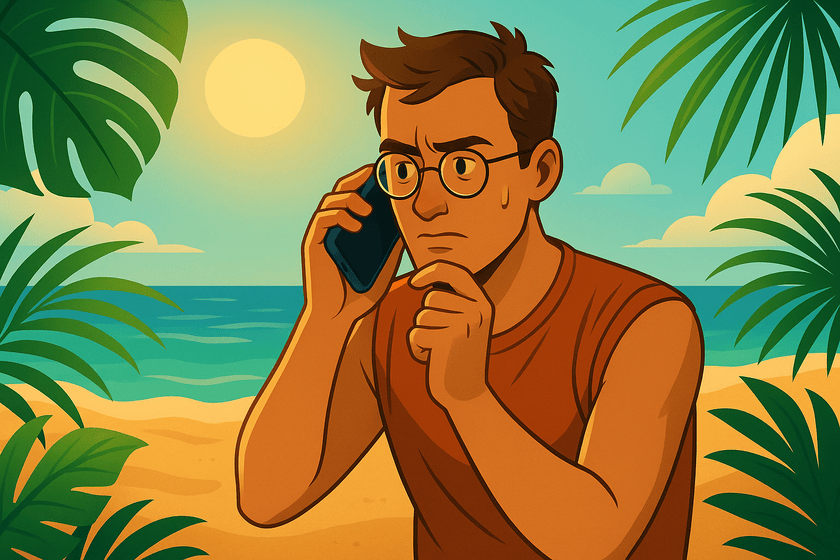

(*AI-generated image*)


#### Twoim celem będzie przeanalizowanie i przetworzenie zbioru danych w taki sposób, by mógł on być użyty do nauki modelu do klasyfikacji każdego pasażera Titanica jako ofiary (0) lub osoby, która przeżyła (1).

(Uwaga: w tym zadaniu nie będziesz trenować modeli, ta przyjemność spotka cię w następnych notebookach)

Poniżej znajdziesz pytania, które mogą być pomocne w analizie, oraz odwołania do poszczególnych sekcji z notebooka do lekcji:

- Czy wszystkie kolumny są istotne w kontekście zadania?
- Czy występują brakujące wartości? Jeśli tak, to jak je uzupełnisz? (sekcja #2.1)
- Czy typy danych są odpowiednie do znaczenia kolumny? (sekcja #1.3)
- Czy dystrybucje danych mają rozkłady normalne, czy asymetryczne? (sekcja #4.1 + wykład)
- Która zmienna oznacza predykowaną klasę?
- Jaki jest rozkład zmiennej predykowanej względem zmiennych kategorialnych, jak i numerycznych? (sekcja #4.1)
- Czy końcowe rozkłady zawierają wartości skrajne? (sekcja #4.2 + wykład)

Wymagania:

- Zbiór musi być oczyszczony, tj. finalnie nie powinien mieć brakujących wartości (sekcja #2.1)
- Zbiór musi zawierać co najmniej dwie dodatkowe kolumny, które mogą wzbogacić informacje zawarte w zbiorze (sekcje #1.5 i #2.2)
- Cechy kategorialne powinny być zakodowane, postaraj się dobrać odpowiedni sposób (sekcja #2.3)
- Zbadaj, czy występują skrajne wartości (outliery) zarówno dla wartości numerycznych, jak i dla kategorialnych
- Każda cecha powinna być zwizualizowana co najmniej raz. Sam(a) zastanów się, czy warto wizualizować cechy parami w celu odkrycia zależności między nimi (sekcja #4.4)
- Nie ma ograniczenia na liczbę komórek, ale zastanów się, czy dana wizualizacja/obliczenie jest przydatne w całej analizie, czy po prostu sobie "egzystuje" bez żadnych wniosków

Zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

Poniżej zamieszczamy tabelę z wyjaśnieniem poszczególnych kolumn:

| Kolumna      | Opis                                                                            |
| ------------ | ------------------------------------------------------------------------------- |
| **Survived** | Czy pasażer przeżył (0 = nie, 1 = tak).                                         |
| **Pclass**   | Klasa podróży (1 = I klasa, 2 = II klasa, 3 = III klasa).                       |
| **Name**     | Imię i nazwisko pasażera.                                                       |
| **Sex**      | Płeć pasażera (male = mężczyzna, female = kobieta).                             |
| **Age**      | Wiek pasażera w latach.                                                         |
| **SibSp**    | Liczba rodzeństwa i małżonków na pokładzie.                                     |
| **Parch**    | Liczba rodziców i dzieci na pokładzie.                                          |
| **Ticket**   | Numer biletu.                                                                   |
| **Fare**     | Cena biletu.                                                                    |
| **Cabin**    | Numer kabiny pasażera                                     |
| **Embarked** | Port, w którym pasażer wsiadł (C = Cherbourg, Q = Queenstown, S = Southampton). |
                                                         |


## ***Podstawowa analiza i statystyka danych***

Wczytanie danych

In [19]:
titanic_data=pd.read_csv(base_path)


Rozmiar danych

In [20]:
titanic_data.shape

(891, 12)

Podgląd na parę pierwszych wartości

In [21]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Opis danych
- Brakujące wartości w 4 kolumnach (Age, Fare, Cabin , Embarked)
- 7 zmiennych liczbowych i 5 kategorialnych

In [22]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         793 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
def get_percentage_missing(df, axis):
  missing_rows = df.isna().sum(axis=axis)
  missing_rows_perc = np.round(missing_rows / df.shape[axis] * 100, 2)
  return missing_rows_perc[missing_rows_perc > 0]

missing_rows_td = get_percentage_missing(titanic_data, axis=1)
missing_rows_td.unique()

array([ 8.33, 16.67, 25.  ])

Sprawdzam czy jakiś wiersz zawiera znaczącą liczbę wartośći NaN.
Mamy wiersze z 1, 2 i 3 brakującymi wartościami na 12

# **Pozbycie się brakujących wartości**


- Age (brakuje 177)
- Fare (brakuje 98)
- Cabin (brakuje 687)
- Embarked (brakuje 2)

Dla zmiennej Age najpierw zbadam jej rozkład, aby sprawdzić czy sensowniejsze jest uzupełnienie brakujących wartości średnią czy też medianą

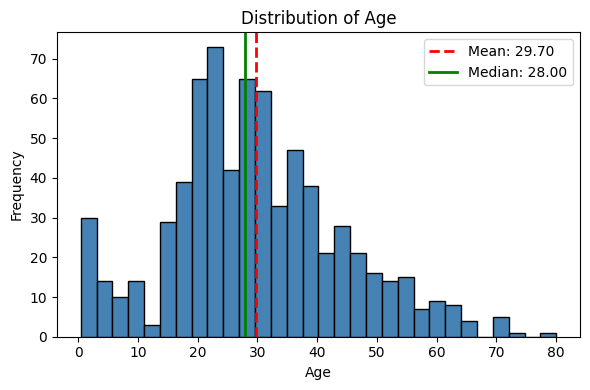

In [24]:
def plot_numeric_histogram(df, column_name):
    data = df[column_name].dropna()
    mean_val = data.mean()
    median_val = data.median()

    plt.figure(figsize=(6, 4))
    plt.hist(data, bins=30, color='steelblue', edgecolor='black')
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_numeric_histogram(titanic_data, 'Age')


Można założyć, że jest to rozkład asymetryczny prawoskośny.
Mediana jest bardziej reprezentatywna dla  wieku, bo średnia jest podwyższona przez starsze osoby.

Zatem brakujące wartości w kolumnie Age uzupełnię medianą.

In [25]:
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())


Teraz sprawdzę czy wszystkie wartości zostały uzupełnione

In [26]:
titanic_data['Age'].isna().sum()



np.int64(0)

Dla zmiennej Fare również zbadam jest rozkład oraz wartości przed uzupełnieniem braków.

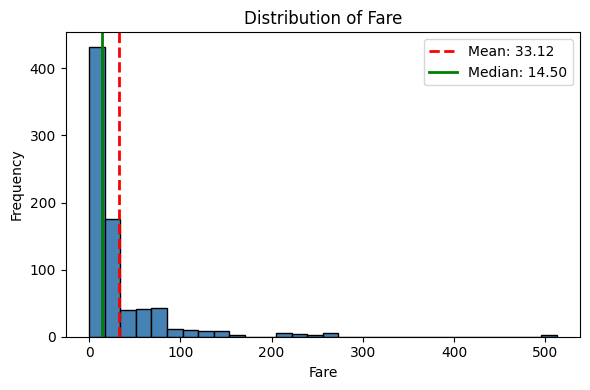

In [27]:
plot_numeric_histogram(titanic_data, 'Fare')

Znów można założyć, że jest to rozkład asymetryczny prawoskośny. Można zauważyć, że większość wartości Fare jest skupiona w jednym miejscu.


Teraz sprawdzę czy Fare jest silnie zależna od klasy (Pclass) w której podróżuje pasażer.

<Axes: xlabel='Pclass', ylabel='Fare'>

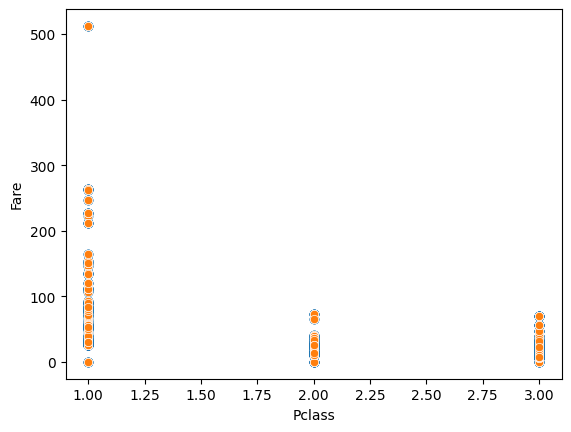

In [28]:
plt.scatter(titanic_data['Pclass'], titanic_data['Fare'])
sns.scatterplot(x='Pclass', y='Fare', data=titanic_data)

Oraz czy zależy od portu, w którym wsiadł pasażer.

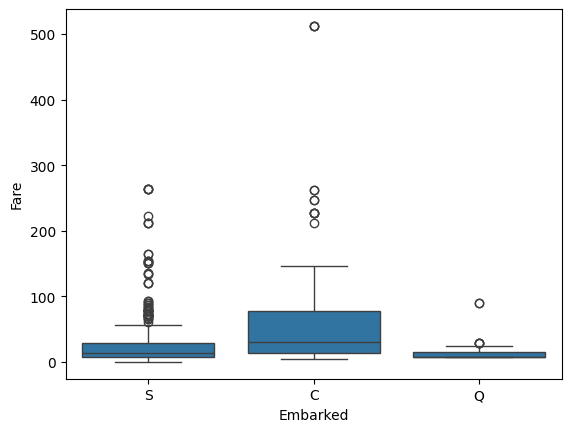

In [29]:
sns.boxplot(x='Embarked', y='Fare', data=titanic_data)
plt.show()

In [30]:
titanic_data['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,      nan,  30.0708,  26.55  ,  31.275 ,
         7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,   7.225 ,
        26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,   7.8792,
         7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,  52.    ,
         7.2292,  11.2417,   9.475 ,  21.    ,  41.5792,  15.5   ,
        21.6792,  17.8   ,  39.6875,   7.8   ,  76.7292,  61.9792,
        27.75  ,  46.9   ,  80.    ,  83.475 ,  27.9   ,  15.2458,
         8.1583,   8.6625,  73.5   ,  14.4542,  56.4958,   7.65  ,
        29.    ,  12.475 ,   9.    ,   9.5   ,   7.7875,  47.1   ,
        15.85  ,  34.375 ,  61.175 ,  20.575 ,  34.6542,  63.3583,
        23.    ,  77.2875,   8.6542,   7.775 ,  24.15  ,   9.825 ,
        14.4583, 247.5208,   7.1417,  22.3583,   6.975 ,   7.05  ,
        15.0458,  26.2833,   6.75  ,  36.75  ,   7.7958,  12.525 ,
        14.5   ,   7.3125,   7.7333,  69.55  ,  16.1   ,  15.7

Można zauważyć, że cena biletu nie zależy bezpośrednio od klasy, w której podróżuje pasażer ( dla tej samej klasy mamy różne opłaty) oraz również nie zależy od portu. Fare uzupełnię zatem zgodnie z rozkładem istniejących danych.

In [31]:
def get_column_distribution(df, column):
  return df[column].value_counts(normalize=True)

fare_count_prob = get_column_distribution(titanic_data, 'Fare')
fare_count_prob

,proportion
Fare,
13.0000,0.047919
8.0500,0.046658
7.8958,0.042875
7.7500,0.037831
26.0000,0.036570
...,...
6.4375,0.001261
39.4000,0.001261
13.8583,0.001261


In [32]:
fare_values = fare_count_prob.index
fare_probs = fare_count_prob.values
missing_fare_vals = titanic_data.Fare.isna()
titanic_data.loc[missing_fare_vals, 'Fare'] = np.random.choice(fare_values, size=missing_fare_vals.sum(), p=fare_probs)

Teraz sprawdzę czy wszystkie wartości zostały uzupełnione

In [33]:
get_column_distribution(titanic_data, 'Fare')

,proportion
Fare,
13.0000,0.051627
8.0500,0.043771
7.8958,0.040404
7.7500,0.034792
26.0000,0.034792
...,...
6.4375,0.001122
39.4000,0.001122
13.8583,0.001122


In [34]:
titanic_data['Fare'].isna().sum()

np.int64(0)

W kolumnie Cabin mamy bardzo dużo brakującyh wartości. Uzupełnianie braków w Cabin jest trudne, bo nie da się łatwo policzyć mediany czy średniej,


In [35]:
titanic_data['Cabin'].isna().sum()

np.int64(687)

In [36]:
titanic_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Widać również, iż żadna wartość nie dominuje, zatem dla brakujących wartośći stworzymą sztuczną kategorię "Unknown"

In [37]:
titanic_data['Cabin'] = titanic_data['Cabin'].fillna('Unknown')

Teraz sprawdzę czy wszystkie wartości zostały uzupełnione

In [38]:
titanic_data['Cabin'].isna().sum()

np.int64(0)

W kolumnie Embarked brakuję tylko 2 wartości i jest to kolumna kategorialna z 3 możliwymi wartościami (S,C,Q). Sprawdzę rozkłąd danych.

In [39]:
titanic_data['Embarked'].isna().sum()

np.int64(2)

In [40]:
titanic_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [41]:
titanic_data['Embarked'].value_counts()


,count
Embarked,
S,644
C,168
Q,77


Widać, iż dominuje jedna wartość S (644 wystąpienia) zatem uzupełnię brakujące komórki w kolumnie Embarked wartością S

In [42]:
titanic_data['Embarked'] = titanic_data['Embarked'].fillna('S')

Teraz sprawdzę czy wszystkie wartości zostały uzupełnione

In [43]:
titanic_data['Embarked'].isna().sum()

np.int64(0)

In [44]:
titanic_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

# **Zakodowanie wartości kategorialnych**

Jako pierwszą zakoduję kolumnę Sex (male/female). Będzie to kodowanie binarne.

In [45]:
titanic_data.Sex.unique()

array(['male', 'female'], dtype=object)

In [46]:
titanic_data['Sex'] = titanic_data.Sex.map({
    'male': 1, 'female': 0
})


In [47]:
titanic_data.Sex.unique()

array([1, 0])

Następnie zakoduje kolumnę Embarked, która ma 3 wartości C,S oraz Q. Użyję One Hot Encoding

In [48]:
titanic_data.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [49]:

one_hot_encoded_embarked = pd.get_dummies(data=titanic_data, prefix='Embarked', columns=['Embarked'], dtype=np.int32)
one_hot_encoded_embarked.head(1)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,Unknown,0,0,1


Następnie pozosyały 3 kolumny kategorialne : Name, Ticket, Cabin
Wszystkie mają bardzo dużo unikalnych wartości (niemal unikalne na wiersz),
Zakodowanie ich one-hot encodingiem może być problematyczne ze względu na za dużo wymiarów.

In [50]:
titanic_data.Name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

Można założyć, że imię pasażera nie ma większego wpływu na to czy osoba przetrwała katastrofę. Z tego powodu usunę kolumnę Name, wcześniej wyciągająć z niej tytuł i tworząć nową kolumnę (Title)

In [51]:
titanic_data['Title'] = titanic_data['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)


Sprawdzę czy dla każdego wiersza udało się uzupełnić Title

In [52]:
titanic_data['Title'].isna().sum()

np.int64(0)

A następnie sprawdzę unikalne wartości kolumny Title

In [53]:
print(titanic_data['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


In [54]:
titanic_data['Title'].value_counts()


,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


/tmp/ipython-input-2420339003.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Title', data=titanic_data, palette='viridis')


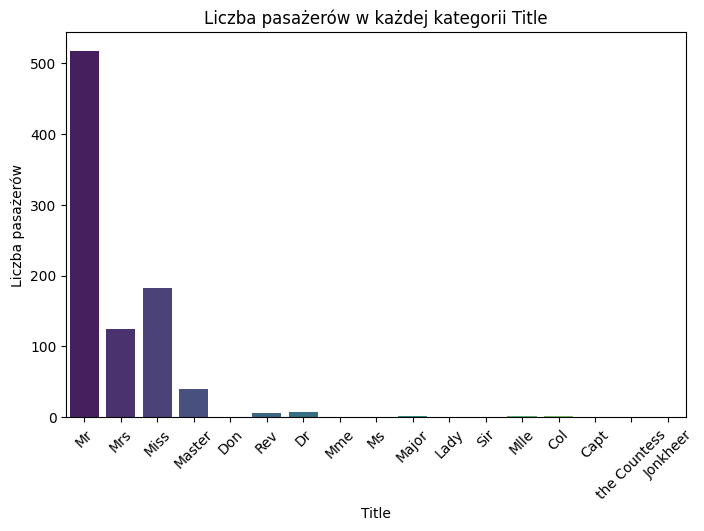

In [55]:
plt.figure(figsize=(8,5))
sns.countplot(x='Title', data=titanic_data, palette='viridis')
plt.title('Liczba pasażerów w każdej kategorii Title')
plt.xlabel('Title')
plt.ylabel('Liczba pasażerów')
plt.xticks(rotation=45)
plt.show()


Jak widać powstało 17 uniklanych wartości Title, jednak niektóre wartości występują tylko 1 albo 2 razy, są to ouliery, zamiast ich używać stworzę i przypiszę im kategorię Other.



In [56]:
title_counts = titanic_data['Title'].value_counts()
rare_titles = title_counts[title_counts < 3].index
titanic_data['Title'] = titanic_data['Title'].replace(rare_titles, 'Other')

In [57]:
print(titanic_data['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Other' 'Rev' 'Dr']


Teraz mogę użyć One-Hot Encoding do zakodowania wartości kolumny Title


In [58]:
one_hot_encoded_titles = pd.get_dummies(data=titanic_data, prefix='Title', columns=['Title'], dtype=np.int32)
one_hot_encoded_titles.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,Unknown,S,0,0,0,1,0,0,0


Teraz mogę usunąć kolumnę Name

In [59]:
titanic_data = titanic_data.drop(columns=['Name'])


Następnie w kolumnie Ticket również występuję bardzo dużo wartości unikalnych , trudnych do zakodowania. Dlatego kolumnę tą usunę.

In [60]:
titanic_data.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [61]:
titanic_data = titanic_data.drop(columns=['Ticket'])

W kulmnie kategorycznej Cabin również występuje wiele unikalnych wartości, a także wiele wartości Unknown.

In [62]:
print(titanic_data['Cabin'].unique())

['Unknown' 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78'
 'D33' 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26'
 'C110' 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7'
 'C49' 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87'
 'B77' 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26'
 'C106' 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124'
 'C91' 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44'
 'A34' 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20'
 'B79' 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101'
 'C68' 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48'
 'E58' 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24'
 'C90' 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3'
 'D6' 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24'
 'C50' 'B42' 'C148']


Można jednak zauważyć, że wartość kabiny (jeżeli występuje) to zaczyna się od literki. Może to być cenniejsza informacja niż 204 unikalne wartości, dlatego kolumnę Cabin uproszczę do pierwszych liter, a następnie zakoduje.

In [63]:
titanic_data['Cabin'] = titanic_data['Cabin'].apply(lambda x: x if x == 'Unknown' else x[0])

In [64]:
print(titanic_data['Cabin'].unique())

['Unknown' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


/tmp/ipython-input-3942123723.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cabin', data=titanic_data, palette='viridis')


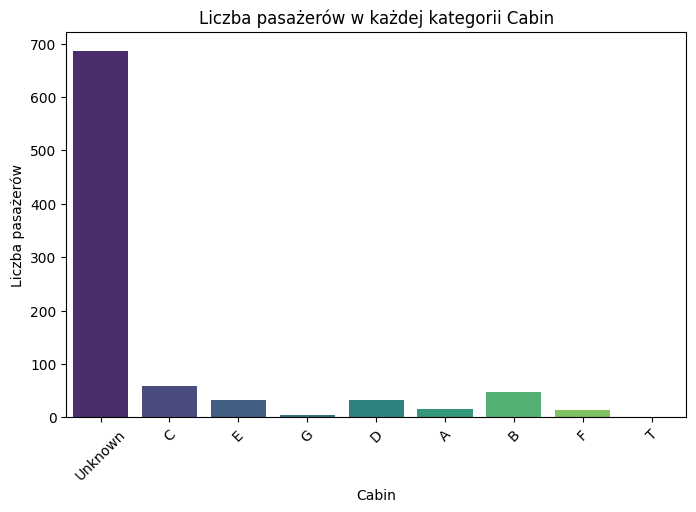

In [65]:
plt.figure(figsize=(8,5))
sns.countplot(x='Cabin', data=titanic_data, palette='viridis')
plt.title('Liczba pasażerów w każdej kategorii Cabin')
plt.xlabel('Cabin')
plt.ylabel('Liczba pasażerów')
plt.xticks(rotation=45)
plt.show()

Powstało nam 9 unikalnych wartości kolumny Cabin



In [66]:
titanic_data['Cabin'].value_counts()

,count
Cabin,
Unknown,687
C,59
B,47
D,33
E,32
A,15
F,13
G,4
T,1


Teraz użyję One-Hot Encoding do zakodowania tych wartości.

In [67]:
one_hot_encoded_titles = pd.get_dummies(data=titanic_data, prefix='Cabin', columns=['Cabin'], dtype=np.int32)
one_hot_encoded_titles.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Unknown
0,1,0,3,1,22.0,1,0,7.25,S,Mr,0,0,0,0,0,0,0,0,1


# **Dodatkowe kolumny**

FamilySize - to liczba osób w rodzinie (łącznie z pasażerem) , kolumna liczbowa

In [68]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

In [69]:
titanic_data['FamilySize'].isna().sum()

np.int64(0)

IsMother - czy pasażerka jest matką (kobieta, ma dzieci na pokładzie, starsza niż 18 lat)
- 1 jeżeli jest matką
- 0 jeżeli nie jest matką



In [70]:
titanic_data['IsMother'] = ((titanic_data['Sex'] == 1) &
                            (titanic_data['Parch'] > 0) &
                            (titanic_data['Age'] > 18)
                           ).astype(int)

In [71]:
titanic_data['IsMother'].isna().sum()

np.int64(0)

IsFather - czy pasażer jest ojcem (mężczyzna, ma dzieci na pokładzie, starszy niż 18 lat).
- 1 jeżeli jest ojcem
- 0 jeżeli nie jest ojcem

In [72]:
titanic_data['IsFather'] = ((titanic_data['Sex'] == 0) &
                            (titanic_data['Parch'] > 0) &
                            (titanic_data['Age'] > 18)
                           ).astype(int)


In [73]:
titanic_data['IsFather'].isna().sum()

np.int64(0)

# **Wykrywanie outlierów**

Dla kolumny Age użyję wykresu Boxplot do zbadania outlierów

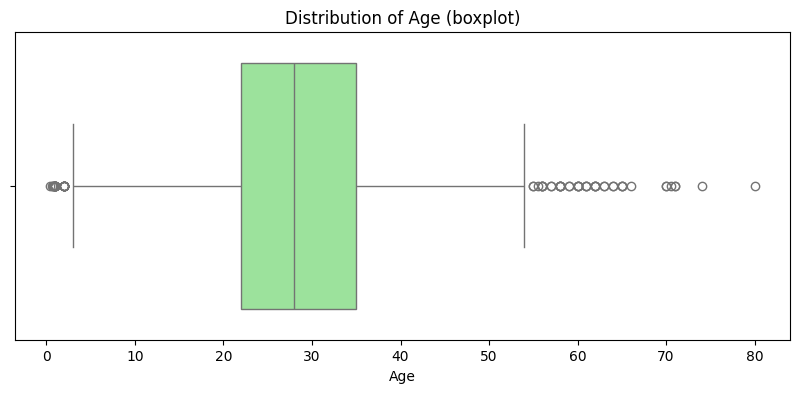

In [74]:
  def boxplot(df, column_name):
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[column_name].dropna(), color='lightgreen')
    plt.title(f'Distribution of {column_name} (boxplot)')
    plt.xlabel(column_name)

    plt.show()

  boxplot(titanic_data, 'Age')

Można zauważyć, że po prawej stronei wykresu występuje znacząca ilość wartości odstających. Usunę ouliery używając standardowego progu - 1,5 * IQR

In [75]:
Q1 = titanic_data['Age'].quantile(0.25)
Q3 = titanic_data['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

titanic_data = titanic_data[(titanic_data['Age'] >= lower_bound) &
                                        (titanic_data['Age'] <= upper_bound)]

Dla kolumny SibSp użyję wykresu Boxplot do zbadania outlierów

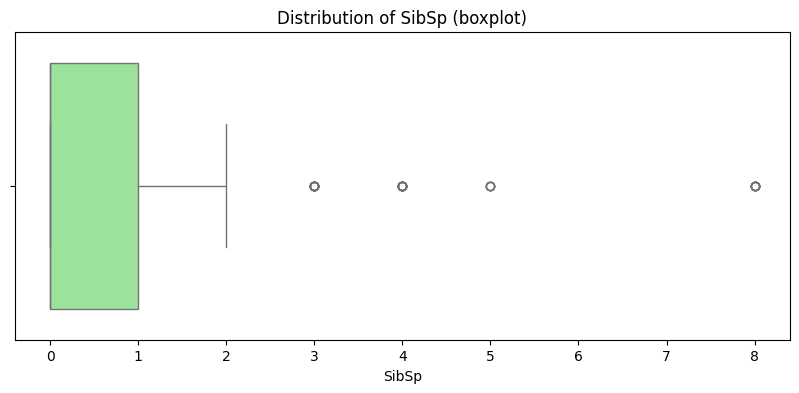

In [76]:
boxplot(titanic_data, 'SibSp')

W tym wypadku przed ewentualnym usunięciem oulierów sprawdzę czy nie ma korelacji pomiędzy wysokim SibSp, a przeżyciem pasażera za pomocą Scatter plot

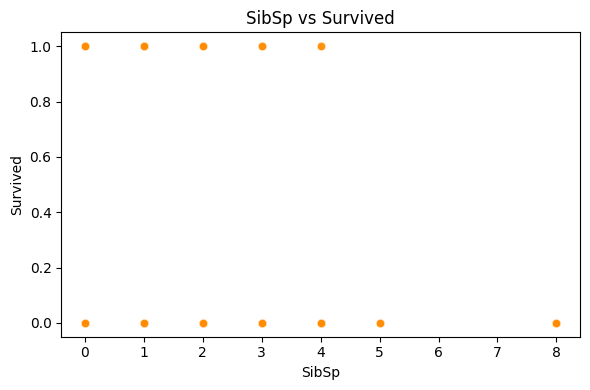

In [77]:

def scatterplot(df, column_name, y):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=column_name, y=y, color='darkorange', alpha=0.6)
    plt.title(f'{column_name} vs {y}')
    plt.xlabel(column_name)
    plt.ylabel('Survived')
    plt.tight_layout()
    plt.show()


scatterplot(titanic_data, 'SibSp', 'Survived')



Można zauważyć, że dla SibSp od 0 do 4 mamy wartości Survived zarówno 1 jak i 0 natomiast dla SibSp od 5 do 8 występuje jedynie wartość 0 dla Survived. Usunięcie oulierów było by tutaj nierozsądnę, gdyż mogą one być później  znaczącym czynkiem dla przewidywania modelu.

Teraz przeprowadzę taką samą analizę dla kolumny Parch

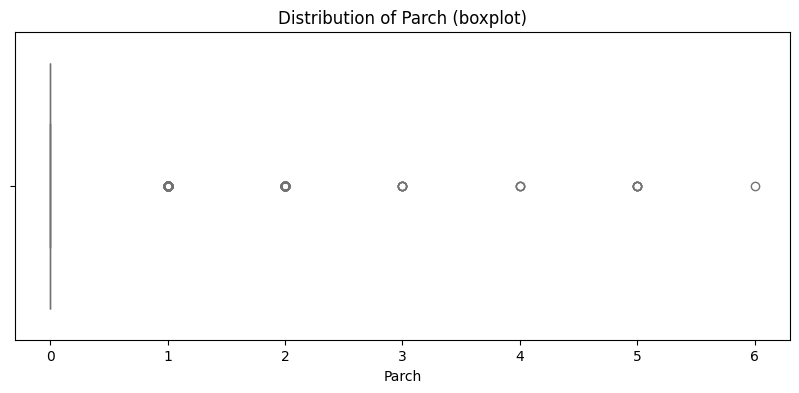

In [78]:
boxplot(titanic_data, 'Parch')

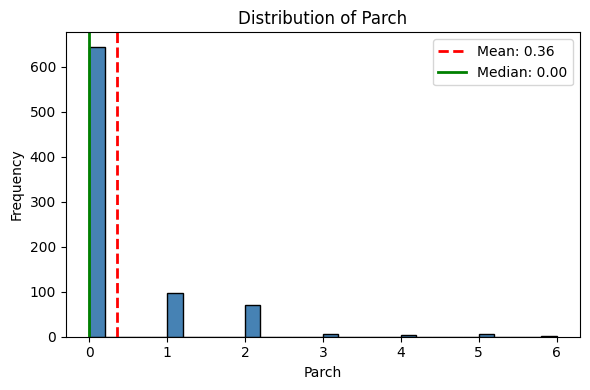

In [79]:
plot_numeric_histogram(titanic_data, 'Parch')

Tutaj również mamy wartości odstające od średniej. Ta jednak wynosi 0.

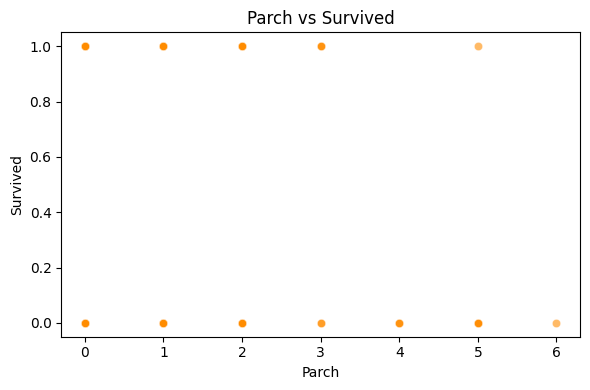

In [80]:
scatterplot(titanic_data, 'Parch', 'Survived')

W kolumnie Parch również zdecydowałam się nie usuwać wartości odstających.

Kolejna analiza dla kolumny FamilySize

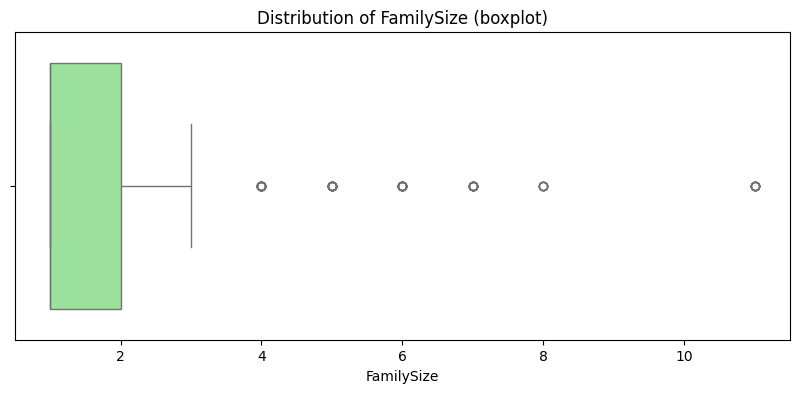

In [81]:
boxplot(titanic_data, 'FamilySize')

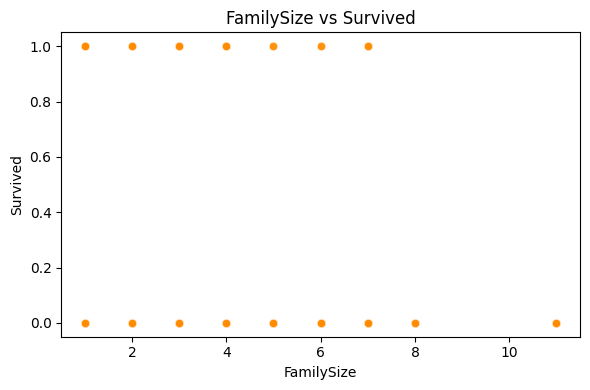

In [82]:
scatterplot(titanic_data, 'FamilySize', 'Survived')

Teraz sprawdzę rozkład danych w kolumnie Pclass

In [83]:
titanic_data['Pclass'].value_counts()

,count
Pclass,
3,469
1,187
2,169


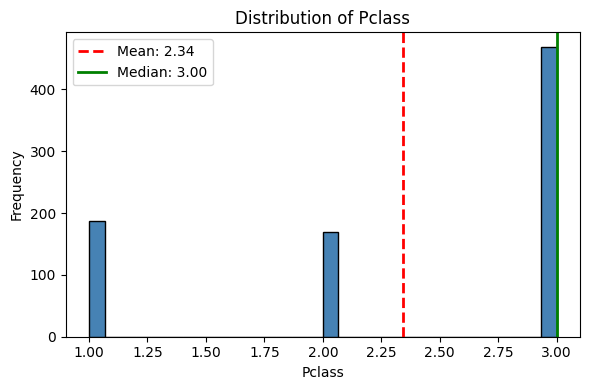

In [84]:
plot_numeric_histogram(titanic_data, 'Pclass')

W przypadk tej kolumny nie mamy żadnych oulierów, wystepują 3 wartości.

Następnie przeanalizuję wartości w kolumnie Fare

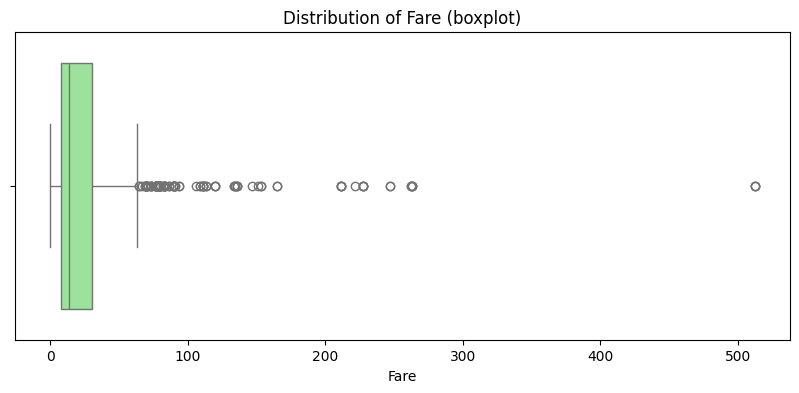

In [85]:
boxplot(titanic_data, 'Fare')

Można zauważyć jedną dość mocną odbiegająca wartość po prawej stronie. Usunę ją używając progu - 3*QR

In [86]:
Q1 = titanic_data['Fare'].quantile(0.25)
Q3 = titanic_data['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 3.0 * IQR
upper_bound = Q3 + 3.0 * IQR

titanic_data = titanic_data[(titanic_data['Fare'] >= lower_bound) &
                                        (titanic_data['Fare'] <= upper_bound)]

Dla kolumn takich jak Sex, Survived, Embarked, IsMother oraz IsFather nie ma potrzeby badania oraz usuwania oulierów, ponieważ takowe nie występują. Każda z tych kolumn ma wartości tylko z ściśle określonego zbioru.

# **Wizualizacje danych**

Sprawdzę czy istnieje korelacja pomiędzy kabiną pasażera, a klasą w której podróżował za pomocą Heatmapy

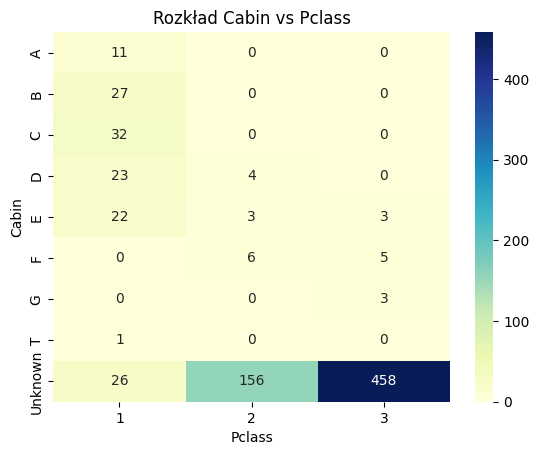

In [87]:
cross_tab = pd.crosstab(titanic_data['Cabin'], titanic_data['Pclass'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Rozkład Cabin vs Pclass')
plt.show()

Można zauważyć, że dla większości podróżnych z klasy 3 kabina nie jest znana.Teraz również za pomocą Barplot sprawdzę, czy klasa podróżującego ma związek z wartoscią kolumny Survived

/tmp/ipython-input-1606824824.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=titanic_data, ci=None, palette='viridis')
/tmp/ipython-input-1606824824.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=titanic_data, ci=None, palette='viridis')


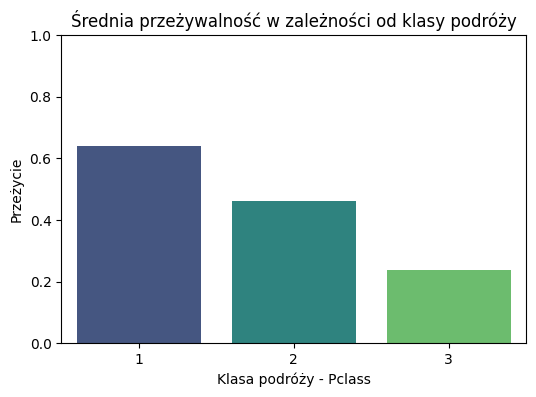

In [88]:
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=titanic_data, ci=None, palette='viridis')
plt.title('Średnia przeżywalność w zależności od klasy podróży')
plt.xlabel('Klasa podróży - Pclass')
plt.ylabel('Przeżycie')
plt.ylim(0, 1)  # skala od 0 do 1
plt.show()

Można zauważyć, że dla klasy 1 średnie Survived jest bliższe wartości 1 a dla klasy 3 bliższe wartości 0. Można wywnioskować, że klasa w której podróżował pasażer mogła mieć wpływ na to czy pasażer przeżył.

Następnie sprawdzę, jak duży wpływ na przeżycie miała obecność rodziny, badająć zmienne: SibSp, Parch, FamilySize, IsMother oraz IsFather

/tmp/ipython-input-952955814.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=category_col, y='Survived', data=df, ci=None, palette='coolwarm')
/tmp/ipython-input-952955814.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_col, y='Survived', data=df, ci=None, palette='coolwarm')


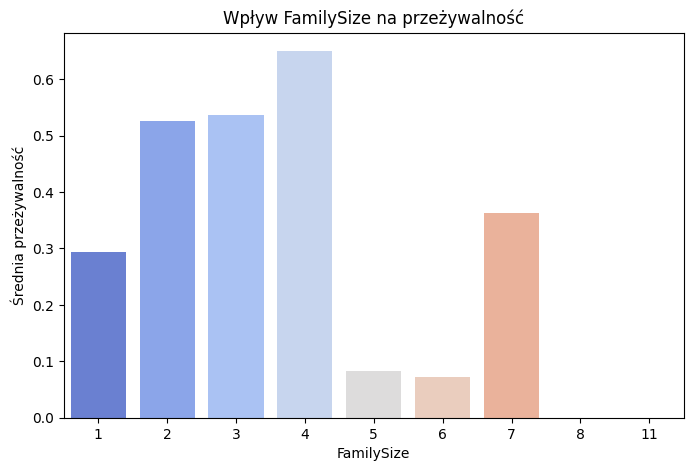

/tmp/ipython-input-952955814.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=category_col, y='Survived', data=df, ci=None, palette='coolwarm')
/tmp/ipython-input-952955814.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_col, y='Survived', data=df, ci=None, palette='coolwarm')


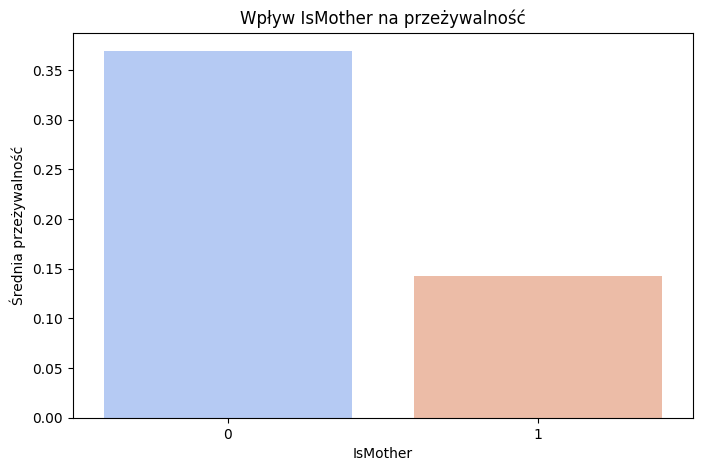

/tmp/ipython-input-952955814.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=category_col, y='Survived', data=df, ci=None, palette='coolwarm')
/tmp/ipython-input-952955814.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_col, y='Survived', data=df, ci=None, palette='coolwarm')


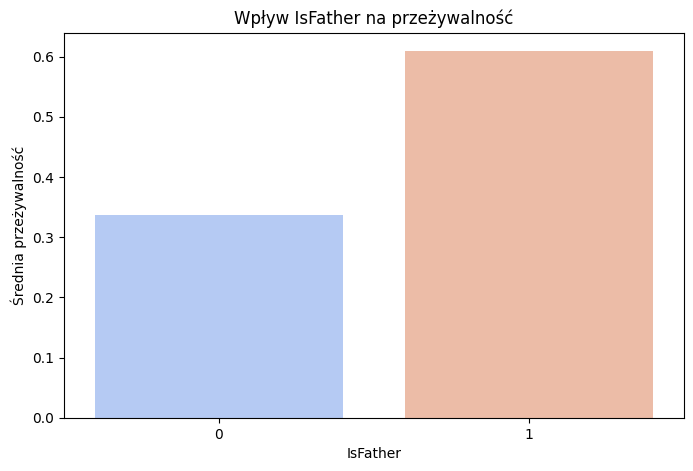

In [89]:
def plot_survival_barplot(df, category_col):
    plt.figure(figsize=(8,5))
    sns.barplot(x=category_col, y='Survived', data=df, ci=None, palette='coolwarm')
    plt.title(f'Wpływ {category_col} na przeżywalność')
    plt.xlabel(category_col)
    plt.ylabel('Średnia przeżywalność')
    plt.show()

plot_survival_barplot(titanic_data, 'FamilySize')
plot_survival_barplot(titanic_data, 'IsMother')
plot_survival_barplot(titanic_data, 'IsFather')

Na wykresie widać, że osobą podróżująca z rodziną od 2 do 4 osób miałą średnio większą szanse na przeżycie niż osoby z rodzin o innej liczebności (zwłaszcza 5 i 6). Matki miały średnio mniejszą szanse na przeżycie niż kobiety bez dzieci. Odwrotnie natomiast było dla mężczyzn, średnio ojcowie mieli większą szanse na przeżycie.

/tmp/ipython-input-4089941227.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Count', y='Survived', hue='Relation_Type', data=df_long, ci=None, palette='coolwarm')


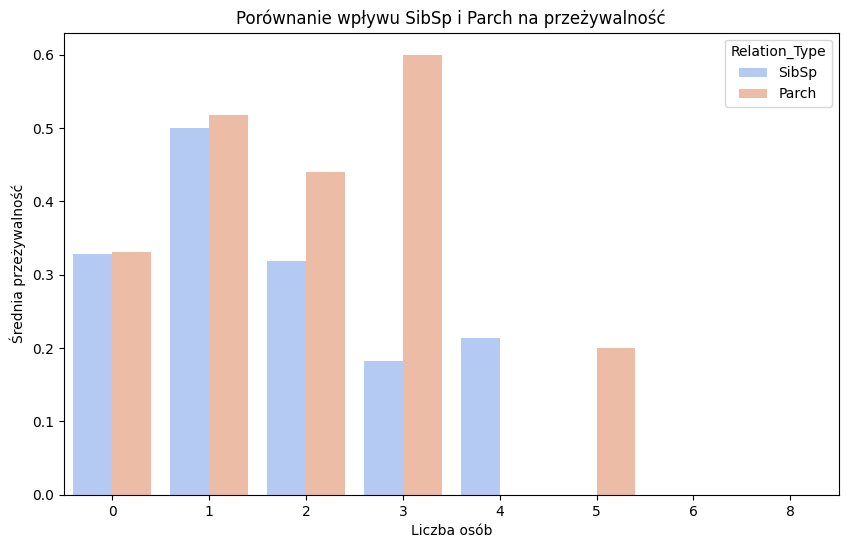

In [90]:
df_long = titanic_data.melt(id_vars=['Survived'], value_vars=['SibSp', 'Parch'],
                            var_name='Relation_Type', value_name='Count')

plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Survived', hue='Relation_Type', data=df_long, ci=None, palette='coolwarm')
plt.title('Porównanie wpływu SibSp i Parch na przeżywalność')
plt.xlabel('Liczba osób')
plt.ylabel('Średnia przeżywalność')
plt.show()

Tutaj chciałam porównać czy większy wpływ na przeżycie miała liczba rodzeństwa i małżonków czy też liczba dzieci i rodziców. W większości przypadków dzieci i rodzice bardziej przyczynili się do przeżycia pasażera niż małżonek i rodzeństwo.

Poniżej za pomocą heatmapy sprawdziłam zależność Pclass od Title i czy miało to wpływ na przeżycie

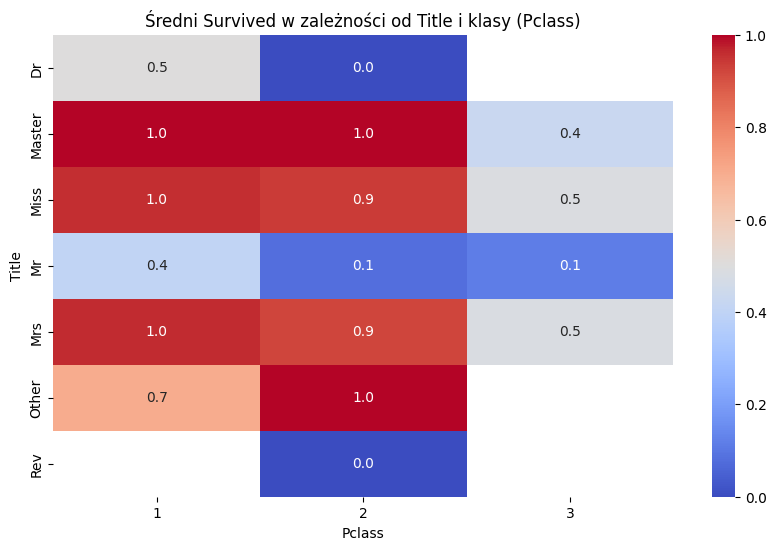

In [91]:
pivot_table = titanic_data.pivot_table(index='Title', columns='Pclass', values='Survived', aggfunc='mean')

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Średni Survived w zależności od Title i klasy (Pclass)')
plt.ylabel('Title')
plt.xlabel('Pclass')
plt.show()

Kolejnym czynnikiem który mógł mieć wpływ na Cabin, ale tez przeżycie mogł być port (Embarked)

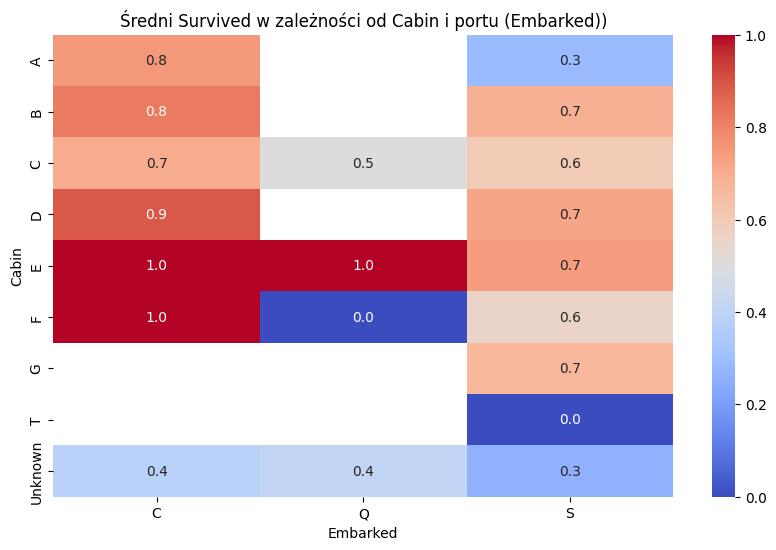

In [92]:
pivot_table = titanic_data.pivot_table(index='Cabin', columns='Embarked', values='Survived', aggfunc='mean')

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Średni Survived w zależności od Cabin i portu (Embarked))')
plt.ylabel('Cabin')
plt.xlabel('Embarked')
plt.show()